<a href="https://colab.research.google.com/github/reshmapramod/Heart-rate-measurement-using-camera/blob/master/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving train.csv to train (1).csv


Saving test.csv to test (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
info for training None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  


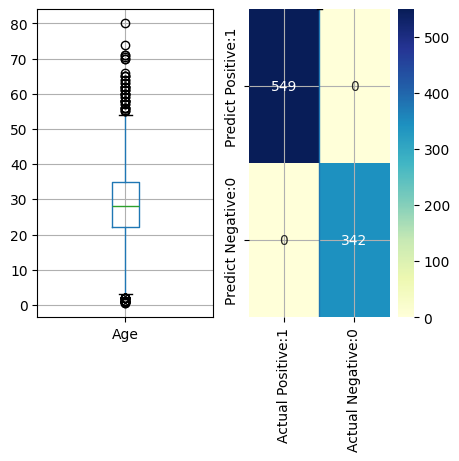

In [62]:
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as make_subplots
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train=pd.read_csv('train.csv')

test=pd.read_csv('test.csv')
from google.colab import files

uploaded = files.upload()
from google.colab import files

uploaded = files.upload()
print("info for training",train.info())
print('info for testting',test.info())
x_train=train.drop(['Survived'],axis=1)
y_tarin=train['Survived']
x_train=train.drop(['Survived'],axis=1)
y_tarin=train['Survived']
category=[var for var in x_train.columns if x_train[var].dtype=='O']
print(category)
print(train[category].isnull().sum())
print(x_train[category].head())
x_train['Name'].unique()
x_train["Ticket"].unique()
x_train[category].describe()
x_train.isnull().sum()
co=x_train['Age'].median()
x_train['Age']=x_train['Age'].fillna(co)
x_train['Age'].describe()
x_train['Age'].isnull().sum()
plt.figure(figsize=(5,4))
plt.subplot(1,2,1)
fig=x_train.boxplot(column='Age')
plt.subplot(1,2,2)
fig=x_train.boxplot(column='Fare')
iqr=x_train.Age.quantile(.75)- x_train.Age.quantile(.25)
lower_fence=x_train.Age.quantile(.25)-(iqr*1)
upper_fence=x_train.Age.quantile(.75)+(iqr*1)
print(upper_fence)
print(lower_fence)
iqr=x_train.Fare.quantile(.75)- x_train.Fare.quantile(.25)
lower_fence=x_train.Fare.quantile(.25)-(iqr*1)
upper_fence=x_train.Fare.quantile(.75)+(iqr*1)
print(upper_fence)
print(lower_fence)
x_train['Age'] = np.where(x_train['Age'] > 48, 48, x_train['Age'])
x_train['Fare']=np.where(x_train['Fare']>54.08,54.08,x_train['Fare'])
x_train['Age'].describe()
x_train['Fare'].describe()
x_train.isnull().sum()
x_train.describe()
x_train.head()
x_train.head()
x_train.isnull().sum()
x_train.drop('PassengerId',axis=1)
test.drop('PassengerId',axis=1)
test.isnull().sum()
test['Cabin'].head()
numerical=[var for var in test.columns if test[var].dtype!='O']
print(numerical)
for c in numerical:
    co = test[c].median()
    test[c] = test[c].fillna(co)
test['Cabin'].shape
test.drop(['Cabin'],axis=1)
import category_encoders as ce
for col in category:
    encoder=ce.OneHotEncoder(cols=[col])
    x_train=encoder.fit_transform(x_train)
    test=encoder.transform(test)
!pip install category_encoders
test.isnull().sum()
test.describe()
test['Age'] = np.where(test['Age'] > 48.5, 48.5, test['Age'])
test['Fare']=np.where(test['Fare']>54.56,54.56,test['Fare'])
test['Age'].describe()
test['Fare'].describe()
category2=[var for var in test.columns if test[var].dtype=='O']
print(category2)
print(test[category2].isnull().sum())
test.head()
test.isnull().sum()
test.info()
col1=x_train.columns
col2=test.columns
scaler=Normalizer()
x_train=scaler.fit_transform(x_train)
test=scaler.fit_transform(test)
x_train=pd.DataFrame(x_train,columns=[col1])
test=pd.DataFrame(test,columns=[col2])
x_test=test
x_test.head()
y_tarin.isnull().sum()
x_train.isnull().sum()
x_train.head()
x_test.isnull().sum()
from sklearn.ensemble import RandomForestClassifier
ra=RandomForestClassifier()
ra.fit(x_train,y_tarin)
y_tarin_pred=ra.predict(x_train)
from sklearn.metrics import accuracy_score

print(accuracy_score(y_tarin,y_tarin_pred)*100)
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(
    rf_clf,
    params_grid,
    scoring="accuracy",
    cv=5,
    verbose=1,
    n_jobs=-1
)


rf_cv.fit(x_train,y_tarin)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")
best_model = RandomForestClassifier(**best_params)
print('best parameters',rf_cv.best_params_)

print('best estimator',rf_cv.best_estimator_)
y_tarin_pred=rf_cv.predict(x_train)
accuracy_score(y_tarin,y_tarin_pred)*100
y_pred=rf_cv.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_tarin,y_tarin_pred)
print(cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
from sklearn.metrics import classification_report

print(classification_report(y_tarin, y_tarin_pred, digits=4))
y_pred.shape
submission = pd.DataFrame({
    'PassengerId': range(892, 892 + len(y_pred)),
    'Survived': y_pred.astype(int)
})
submission.to_csv('submission.csv',index=False)